# Reading groundwater observations

This notebook introduces how to use the `hydropandas` package to read, process and visualise groundwater data from Dino and Bro databases.

## <a id=top></a>Notebook contents

1. [GroundwaterObs](#GroundwaterObs)
2. [ObsCollection](#ObsCollection)
3. [Reading ObsCollections](#readingOC)

In [1]:
import hydropandas as hpd
import logging
from IPython.display import HTML

import logging

In [2]:
hpd.util.get_color_logger('INFO');

## GroundwaterObs<a id=GroundwaterObs></a>

The hydropandas package has several functions to read groundwater observations at a measurement well. These include reading data from:
- dino (from csv-files).
- bro (using the bro-api)
- wiski (dumps from the wiski database)

In [3]:
# reading a bro file from a bro_id
gw = hpd.GroundwaterObs.from_bro("GMW000000041261", 1) 

In [4]:
# reading a dino csv file
fname = 'data/Grondwaterstanden_Put/B33F0080001_1.csv'
gw = hpd.GroundwaterObs.from_dino(fname=fname)

INFO:hydropandas.io.io_dino:reading -> B33F0080001_1.csv


Now we have an `GroundwaterObs` object named `gw`. This object contains all the available information of measurement well 'B33F0080' and filternumber 1. A `GroundwaterObs` object inherits from a pandas `DataFrame` and has the same attributes and methods.

In [5]:
gw.describe()

,filternummer,stand_cm_tov_mp,stand_cm_tov_mv,stand_cm_tov_nap,bijzonderheid,stand_m_tov_nap,meetpunt,maaiveld
count,3988.0,3988.000000,3988.000000,3988.000000,0.0,3988.000000,3988.000000,3988.000000
mean,1.0,158.580742,132.323972,558.722919,NaN,5.587229,7.173037,6.910469
std,0.0,19.048715,19.262626,19.092049,NaN,0.190920,0.021653,0.024010
min,1.0,78.000000,52.000000,490.000000,NaN,4.900000,7.090000,6.850000
25%,1.0,146.000000,120.000000,546.000000,NaN,5.460000,7.180000,6.920000
50%,1.0,159.000000,133.000000,559.000000,NaN,5.590000,7.180000,6.920000
75%,1.0,172.000000,146.000000,571.000000,NaN,5.710000,7.180000,6.920000
max,1.0,226.000000,202.000000,640.000000,NaN,6.400000,7.180000,6.920000


In [6]:
gw

,locatie,filternummer,stand_cm_tov_mp,stand_cm_tov_mv,stand_cm_tov_nap,bijzonderheid,opmerking,stand_m_tov_nap,meetpunt,maaiveld
1972-11-28,B33F0080,1,141,109,576,NaN,NaN,5.76,7.17,6.85
1972-12-07,B33F0080,1,140,108,577,NaN,NaN,5.77,7.17,6.85
1972-12-14,B33F0080,1,147,115,570,NaN,NaN,5.70,7.17,6.85
1972-12-21,B33F0080,1,153,121,564,NaN,NaN,5.64,7.17,6.85
1972-12-28,B33F0080,1,160,128,557,NaN,NaN,5.57,7.17,6.85
...,...,...,...,...,...,...,...,...,...,...
2015-06-13,B33F0080,1,176,150,542,NaN,NaN,5.42,7.18,6.92
2015-06-14,B33F0080,1,176,150,542,NaN,NaN,5.42,7.18,6.92
2015-06-15,B33F0080,1,178,152,540,NaN,NaN,5.40,7.18,6.92
2015-06-16,B33F0080,1,178,152,540,NaN,NaN,5.40,7.18,6.92


<AxesSubplot:ylabel='m NAP'>

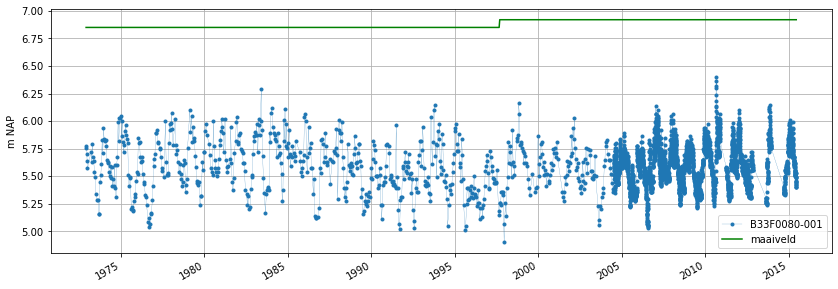

In [7]:
ax = gw['stand_m_tov_nap'].plot(label=gw.name, figsize=(14,5), legend=True,
                                marker='.', lw=0.2)
gw['maaiveld'].plot(ax=ax, label='maaiveld', legend=True, grid=True, color='green',ylabel='m NAP')


#### GroundwaterObs Attributes

Besides the standard `DataFrame` attributes a `GroundwaterObs` has the following additional attributes:
- x, y: x- and y-coordinates of the observation point
- name: str with the name
- filename: str with the filename (only available when the data was loaded from a file)
- locatie: the name for the location of the observation point.
- filternr: the number of the filter. The combination of locatie and filternr should be unique
- bovenkant_filter: the top of the filter
- onderkant_filter: the bottom of the filter
- maaiveld: surface level
- meetpunt: the top of the well
- metadata_available: boolean indicating whether metadata is available for this observation point
- meta: dictionary with additional metadata

When dowloading from Dinoloket all levels are in meters NAP.

In [8]:
print(f'x = {gw.x}')
print(f'y = {gw.y}')
print(f'name = {gw.name}')
print(f'filename = {gw.filename}')
print(f'locatie = {gw.locatie}')
print(f'filternr = {gw.filternr}')
print(f'bovenkant_filter = {gw.bovenkant_filter}')
print(f'onderkant_filter = {gw.onderkant_filter}')
print(f'maaiveld = {gw.maaiveld}')
print(f'meetpunt = {gw.meetpunt}')
print(f'metadata_available = {gw.metadata_available}')

print(f'\nmeta = {gw.meta}')

x = 213260.0
y = 473900.0
name = B33F0080-001
filename = data/Grondwaterstanden_Put/B33F0080001_1.csv
locatie = B33F0080
filternr = 1.0
bovenkant_filter = 3.85
onderkant_filter = 2.85
maaiveld = 6.92
meetpunt = 7.18
metadata_available = True

meta = {'locatie': 'B33F0080', 'x': 213260.0, 'y': 473900.0, 'filternr': 1.0, 'meetpunt': 7.18, 'bovenkant_filter': 3.85, 'onderkant_filter': 2.85, 'maaiveld': 6.92, 'name': 'B33F0080-001', 'metadata_available': True, 'filename': 'data/Grondwaterstanden_Put/B33F0080001_1.csv'}


#### GroundwaterObs methods

Besides the standard `DataFrame` methods a `GroundwaterObs` has additional methods. This methods are accessible through submodules:
- `geo.get_lat_lon()`, to obtain latitude and longitude
- `gwobs.get_modellayer()`, to obtain the modellayer of a modflow model using the filter depth
- `stats.get_seasonal_stat()`, to obtain seasonal statistics
- `stats.obs_per_year()`, to obtain the number of observations per year
- `stats.consecutive_obs_years()`, to obtain the number of consecutive years with more than a minimum number of observations
- `plots.interactie_plot()`, to obtain a bokeh plot





Get latitude and longitude with `gw.geo.get_lat_lon()`:

In [9]:
print(f'latitude and longitude -> {gw.geo.get_lat_lon()}')

latitude and longitude -> (52.250058043935184, 6.240361082512327)


In [10]:
gw.stats.get_seasonal_stat(stat="mean")

,winter_mean,summer_mean
B33F0080-001,5.694514,5.489309


In [11]:
p= gw.plots.interactive_plot('figure')
HTML(filename="figure/{}.html".format(gw.name))

## ObsCollections<a id=ObsCollections></a>

`ObsCollections` are a combination of multiple observation objects such as `GroundwaterObs` objects. The easiest way to construct an `ObsCollections` is from a list of observation objects.

In [13]:
fname1 = 'data/Grondwaterstanden_Put/B33F0080001_1.csv'
fname2 = 'data/Grondwaterstanden_Put/B33F0133001_1.csv'
gw1 = hpd.GroundwaterObs.from_dino(fname=fname1)
gw2 = hpd.GroundwaterObs.from_dino(fname=fname2)

# create ObsCollection
oc = hpd.ObsCollection.from_list([gw1, gw2], name='Dino groundwater')
oc

INFO:hydropandas.io.io_dino:reading -> B33F0080001_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0133001_1.csv


,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B33F0080-001,213260.0,473900.0,data/Grondwaterstanden_Put/B33F0080001_1.csv,B33F0080,1.0,3.85,2.85,6.92,7.18,True,GroundwaterObs B33F0080-001 -----metadata-----...
B33F0133-001,210400.0,473366.0,data/Grondwaterstanden_Put/B33F0133001_1.csv,B33F0133,1.0,-67.50,-70.00,6.50,7.14,True,GroundwaterObs B33F0133-001 -----metadata-----...


Now we have an `ObsCollection` object named `oc`. The `ObsCollection` contains all the data from the two `GroundwaterObs` objects. It also stores a reference to the `GroundwaterObs` objects in the 'obs' column. Just like a `GroundwaterObs` object and `ObsCollection` object inherits from a pandas `DataFrame` and has the same attributes and methods.

In [14]:
# get columns
oc.columns

Index(['x', 'y', 'filename', 'locatie', 'filternr', 'bovenkant_filter',
       'onderkant_filter', 'maaiveld', 'meetpunt', 'metadata_available',
       'obs'],
      dtype='object')

In [15]:
# get statistics
oc.describe()

,x,y,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt
count,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000
mean,211830.000000,473633.000000,1.0,-31.825000,-33.575000,6.710000,7.160000
std,2022.325394,377.595021,0.0,50.452069,51.512729,0.296985,0.028284
min,210400.000000,473366.000000,1.0,-67.500000,-70.000000,6.500000,7.140000
25%,211115.000000,473499.500000,1.0,-49.662500,-51.787500,6.605000,7.150000
50%,211830.000000,473633.000000,1.0,-31.825000,-33.575000,6.710000,7.160000
75%,212545.000000,473766.500000,1.0,-13.987500,-15.362500,6.815000,7.170000
max,213260.000000,473900.000000,1.0,3.850000,2.850000,6.920000,7.180000


In [16]:
# get individual GroundwaterObs object from an ObsCollection
o = oc.loc['B33F0133-001', 'obs']
o

,locatie,filternummer,stand_cm_tov_mp,stand_cm_tov_mv,stand_cm_tov_nap,bijzonderheid,opmerking,stand_m_tov_nap,meetpunt
1989-12-14,B33F0133,1,582.0,530.0,120.0,NaN,NaN,1.20,7.02
1990-01-15,B33F0133,1,545.0,493.0,157.0,NaN,NaN,1.57,7.02
1990-01-29,B33F0133,1,532.0,480.0,170.0,NaN,NaN,1.70,7.02
1990-02-14,B33F0133,1,549.0,497.0,153.0,NaN,NaN,1.53,7.02
1990-03-01,B33F0133,1,546.0,494.0,156.0,NaN,NaN,1.56,7.02
...,...,...,...,...,...,...,...,...,...
2011-01-14,B33F0133,1,357.0,293.0,357.0,NaN,NaN,3.57,7.14
2011-01-15,B33F0133,1,354.0,290.0,360.0,NaN,NaN,3.60,7.14
2011-01-16,B33F0133,1,353.0,289.0,361.0,NaN,NaN,3.61,7.14
2011-01-17,B33F0133,1,353.0,289.0,361.0,NaN,NaN,3.61,7.14


#### ObsCollection Attributes

An `ObsCollection` also has additional attributes:
- name, a str with the name of the collection
- meta, a dictionary with additional metadata

In [17]:
print(f'name is -> {oc.name}')
print(f'meta is -> {oc.meta}')

name is -> Dino groundwater
meta is -> {}


#### ObsCollection methods
Besides the methods of a pandas `DataFrame` an `ObsCollection` has additional methods stored in submodules.

`geo`:
- `get_bounding_box` -> get a tuple with (xmin, ymin, xmax, ymax)
- `get_extent` -> get a tule with (xmin, xmax, ymin, ymax)
- `get_lat_lon` -> to get the lattitudes and longitudes from the x and y coördinates
- `within_polygon` -> to select only the observations that lie within a polygon

`gwobs`:
- `set_filter_num` -> to set the filternumbers based on the filter depth when there are multiple filters at one location
- `set_filter_num_location` -> find out which observations are at the same location with a different filter depth. Set locatie and filternr attributes accordingly.

`plots`:
- `interactive_figures` -> create bokeh figures for each observation point.
- `interactive_map` -> create a folium map with observation points and bokeh figures for each observation point.

`stats`:
- `get_first_last_obs_date()` -> get the first and the last date of the observations for each observation point
- `get_no_of_observations()` -> get the number of observations
- `get_seasonal_stat()` -> get seasonal stats of the observations

E.g. get the bounding box with `gw.geo.get_lat_lon()`:

In [18]:
print(f'bounding box -> {oc.geo.get_bounding_box()}')

bounding box -> (210400.0, 473366.0, 213260.0, 473900.0)


In [19]:
oc.geo.set_lat_lon()
oc.plots.interactive_map(plot_dir='figure')

INFO:hydropandas.extensions.plots:created iplot -> B33F0080-001
INFO:hydropandas.extensions.plots:created iplot -> B33F0133-001


## Reading ObsCollections<a id=readingOC></a>

Instead of creating the ObsCollection from a list of observation objects. It is also possible to read the data from a source into an ObsCollection at once. The following sources can be read as an ObsCollection:

- dino (from files)
- bro (using the api)
- fews (dumps from the fews database)
- wiski (dumps from the wiski database)
- arctic (a Mongo database for timeseries)
- menyanthes (a .men file)
- modflow (from the heads of a modflow model)
- imod (from the heads of an imod model)

This notebook won't go into detail on all the sources that can be read. Only the two options for reading data from Dino and BRO are shown below.

In [21]:
# read using a .zip file with data
dinozip = 'data/dino.zip'
dino_gw = hpd.ObsCollection.from_dino(dirname=dinozip, keep_all_obs=False)
dino_gw

INFO:hydropandas.io.io_dino:reading -> B02H0092001_1.csv
INFO:hydropandas.io.io_dino:reading -> B02H1007001_1.csv
INFO:hydropandas.io.io_dino:reading -> B04D0032002_1.csv
INFO:root:not added to collection -> C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\Grondwaterstanden_Put\B04D0032002_1.csv
INFO:hydropandas.io.io_dino:reading -> B22D0155001_1.csv
INFO:hydropandas.io.io_dino:reading -> B27D0260001_1.csv
INFO:root:not added to collection -> C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\Grondwaterstanden_Put\B27D0260001_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0080001_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0080002_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0133001_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0133002_1.csv
INFO:hydropandas.io.io_dino:reading -> B37A0112001_1.csv
INFO:root:not added to collection -> C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\Grondwaterstanden_Put\B37A0112001_1.csv
INFO:hydropandas.io.io_dino:reading -> B42B0003001_1.csv
INFO

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B02H0092-001,219890.0,600030.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B02H0092,1.0,NaN,NaN,NaN,NaN,True,GroundwaterObs B02H0092-001 -----metadata-----...
B02H1007-001,219661.0,600632.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B02H1007,1.0,NaN,NaN,1.92,NaN,True,GroundwaterObs B02H1007-001 -----metadata-----...
B22D0155-001,233830.0,502530.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B22D0155,1.0,7.80,6.80,8.91,9.94,True,GroundwaterObs B22D0155-001 -----metadata-----...
B33F0080-001,213260.0,473900.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B33F0080,1.0,3.85,2.85,6.92,7.18,True,GroundwaterObs B33F0080-001 -----metadata-----...
B33F0080-002,213260.0,473900.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B33F0080,2.0,-10.15,-12.15,6.92,7.17,True,GroundwaterObs B33F0080-002 -----metadata-----...
B33F0133-001,210400.0,473366.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B33F0133,1.0,-67.50,-70.00,6.50,7.14,True,GroundwaterObs B33F0133-001 -----metadata-----...
B33F0133-002,210400.0,473366.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B33F0133,2.0,-104.20,-106.20,6.50,7.12,True,GroundwaterObs B33F0133-002 -----metadata-----...
B42B0003-001,38165.0,413785.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B42B0003,1.0,-2.00,-3.00,6.50,6.99,True,GroundwaterObs B42B0003-001 -----metadata-----...
B42B0003-002,38165.0,413785.0,C:\Users\oebbe\AppData\Local\Temp\tmp1irmbfgi\...,B42B0003,2.0,-34.00,-35.00,6.50,6.99,True,GroundwaterObs B42B0003-002 -----metadata-----...


In [22]:
# read from bro using an extent
oc = hpd.ObsCollection.from_bro(extent=(213260, 213550, 473890, 473920), only_metadata=True)
oc

INFO:hydropandas.io.io_bro:32 groundwater monitoring wells found within extent


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:08<00:00,  3.68it/s]

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
GMW000000041261,213268.0,473910.0,,GMW000000041261,1,4.05,3.05,6.9,7.173,True,GroundwaterObs GMW000000041261 -----metadata--...
GMW000000041261,213268.0,473910.0,,GMW000000041261,2,-10.53,-11.53,6.9,7.163,True,GroundwaterObs GMW000000041261 -----metadata--...
GMW000000041261,213268.0,473910.0,,GMW000000041261,1,4.05,3.05,6.9,7.173,True,GroundwaterObs GMW000000041261 -----metadata--...
GMW000000041261,213268.0,473910.0,,GMW000000041261,2,-10.53,-11.53,6.9,7.163,True,GroundwaterObs GMW000000041261 -----metadata--...
GMW000000041261,213268.0,473910.0,,GMW000000041261,1,4.05,3.05,6.9,7.173,True,GroundwaterObs GMW000000041261 -----metadata--...
...,...,...,...,...,...,...,...,...,...,...,...
GMW000000041261,213268.0,473910.0,,GMW000000041261,2,-10.53,-11.53,6.9,7.163,True,GroundwaterObs GMW000000041261 -----metadata--...
GMW000000041261,213268.0,473910.0,,GMW000000041261,1,4.05,3.05,6.9,7.173,True,GroundwaterObs GMW000000041261 -----metadata--...
GMW000000041261,213268.0,473910.0,,GMW000000041261,2,-10.53,-11.53,6.9,7.163,True,GroundwaterObs GMW000000041261 -----metadata--...
